<a href="https://colab.research.google.com/github/Rabbii96/Rabbii96/blob/main/Thesis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install bnlp_toolkit

In [ ]:
import pandas as pd    # to load dataset
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
import re
import io
from wordcloud import WordCloud
from googleapiclient.http import MediaIoBaseDownload
from PIL import Image
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, cross_validate
from nltk.tokenize import WordPunctTokenizer
import imageio as iio
import cv2
from wordcloud import WordCloud
from bnlp.corpus import stopwords, punctuations

ModuleNotFoundError: ignored

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Thesis Final/'

# **Importing Data From Google Drive**

# **Importing DataSet**

In [ ]:
#df = pd.read_csv(path+'dataset(2).csv')
df = pd.read_csv(path+'Banglanewsdataset.csv')

In [ ]:
df = df.dropna();

In [ ]:
df

,SL,Headlines,Text,Source,Category
0,1,মন খারাপ করে ফিরেছেন সজল,গত কয়েক সপ্তাহ ধরে যুক্তরাষ্ট্রে অবস্থান করছি...,প্রথম আলো,Entertainment
1,2,অভিনেত্রীর আঁকা ছবি বিক্রির অর্থ যাবে বন্যাদুর...,পেশায় অভিনয়শিল্পী। এর বাইরেও আলাদা একটা গুণ ...,প্রথম আলো,Entertainment
2,3,ত্রাণ দিতে গিয়ে তাশরীফের অন্য রকম অভিজ্ঞতা,সিলেটে ত্রাণ দিতে গিয়ে বিরূপ অভিজ্ঞতার মুখোমু...,প্রথম আলো,Entertainment
3,4,২৯৯ টাকায় নিজেকে ওটিটি পর্দায় দেখাতে চাই না:...,বড় পর্দার বাইরে এখন ওটিটি প্ল্যাটফর্ম নিয়ে উ...,প্রথম আলো,Entertainment
4,5,"‘পাগলামি থেকে চলচ্চিত্রে এসেছি,’ অভিনয়ের ৫০ ব...",বাবা ছিলেন বাংলাদেশের প্রথম সবাক চলচ্চিত্র ‘মু...,প্রথম আলো,Entertainment
...,...,...,...,...,...
20424,20426,রাজনৈতিক দলের পরামর্শে গ্রহণযোগ্য ইসি গঠিত হবে...,অ্যাকশন হিরো সাজার সাধ থাকলেও তাঁর ছেলেমানুষি ...,নয়া দিগন্ত,Entertainment
20425,20427,৭ দশমিক ২ শতাংশ প্রবৃদ্ধি হবে আশা অর্থমন্ত্রীর,শাহরুখ খান সবসময় সবচেয়ে সুন্দর ছবিগুলোই সোশ্যা...,নয়া দিগন্ত,Entertainment
20426,20428,শ্রমজীবী মানুষের অধিকার প্রতিষ্ঠার মাধ্যমে দেশ...,দীপিকা পাড়ুকোন ও রণবীর কাপুর অভিনীত তামাশা ছবি...,নয়া দিগন্ত,Entertainment
20427,20429,আওয়ামী লীগ স্বাধীনতার বিরোধী শক্তিতে পরিণত হয়ে...,রোহিত শেঠির পরবর্তী ছবিতে জুটিবদ্ধ হয়ে ফিরছেন ...,নয়া দিগন্ত,Entertainment


#**Data Visualisation**



In [ ]:
import plotly.express as px
fig = px.pie(df, names='Source', title ='Pie chart of different Sources')
fig.show()

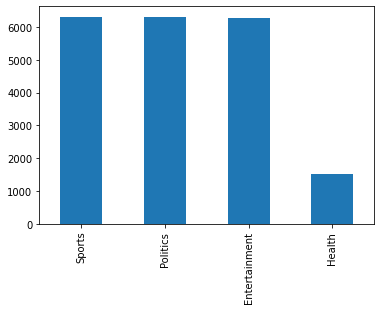

In [ ]:
df['Category'].value_counts().plot(kind='bar')

Plot review/comment/opinion (RCO) length

(0.0, 600.0)

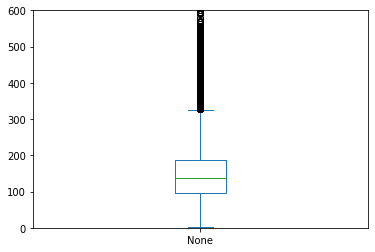

In [ ]:
# Calculate RCO lengths
rco_len = pd.Series([len(rco.split()) for rco in df['Text']])
ax = rco_len.plot.box()
plt.ylim([0, 600])

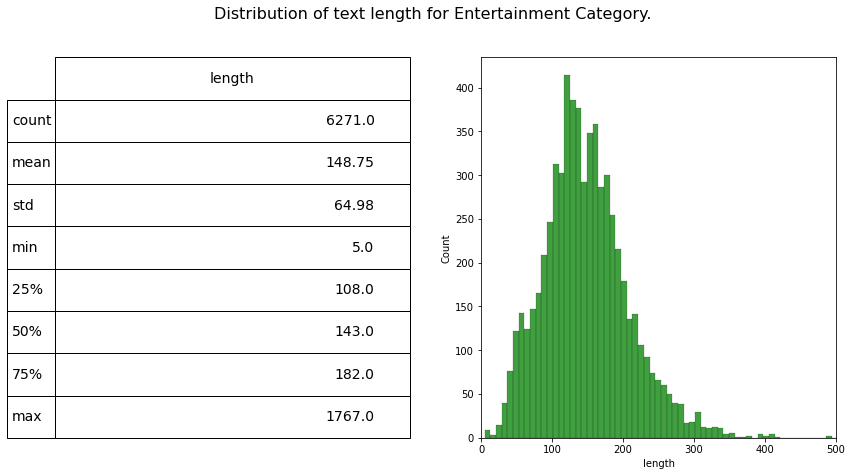

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Category']=='Entertainment']['length'], ax=ax1,color='green')
plt.xlim([0, 500])
describe = df.length[df.Category=='Entertainment'].describe().to_frame().round(2)


ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Entertainment Category.', fontsize=16)
plt.show()

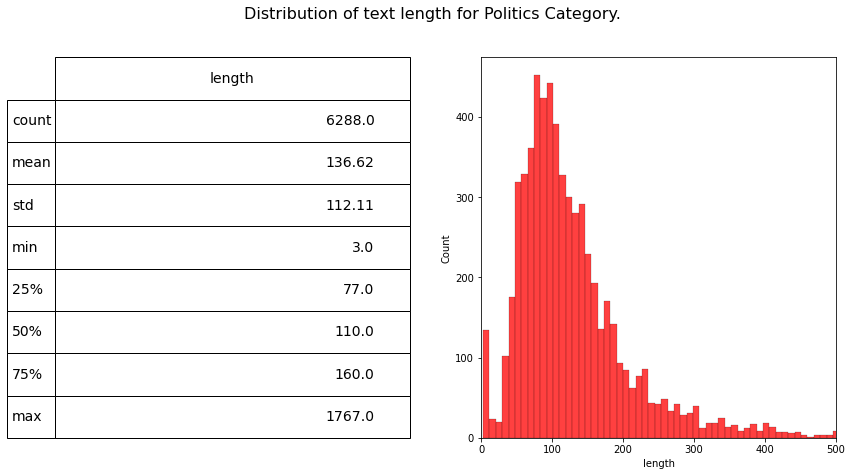

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Category']=='Politics']['length'], ax=ax1,color='red')
plt.xlim([0, 500])
describe = df.length[df.Category=='Politics'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Politics Category.', fontsize=16)

plt.show()

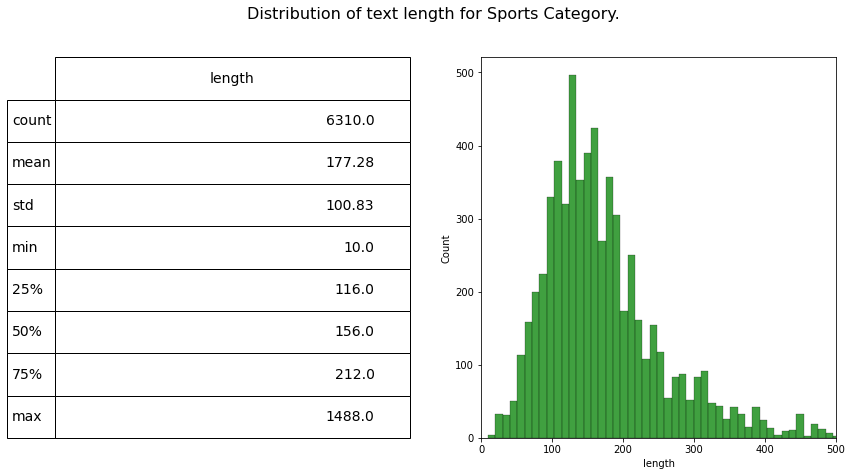

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Category']=='Sports']['length'], ax=ax1,color='green')
plt.xlim([0, 500])
describe = df.length[df.Category=='Sports'].describe().to_frame().round(2)


ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Sports Category.', fontsize=16)
plt.show()

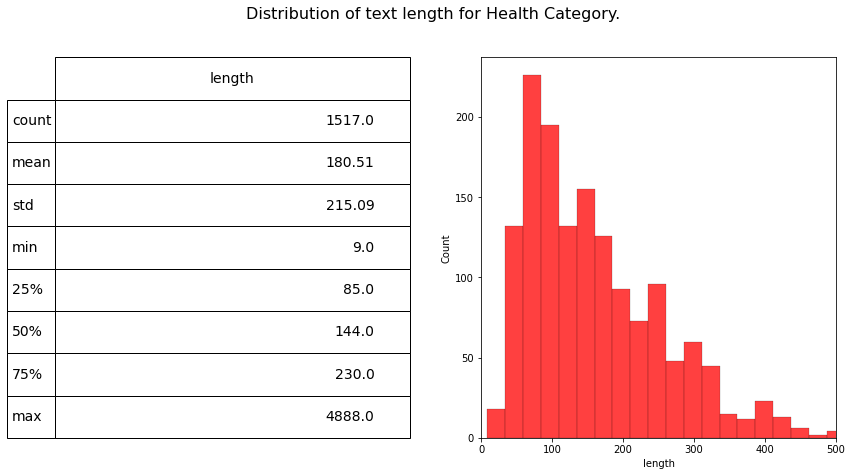

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Category']=='Health']['length'], ax=ax1,color='red')
plt.xlim([0, 500])
describe = df.length[df.Category=='Health'].describe().to_frame().round(2)
ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Health Category.', fontsize=16)
plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(df, names='Category', title ='Pie chart of different Category News')
fig.show()

Visualizing data into wordclouds

In [ ]:
def create_wordcloud(df, Category, stopwords, imgMask):
    combined_rco = " ".join([tweet for tweet in df[df.Category==Category]['Text']])

    # generating wordcloud
    regex = r"[\u0980-\u09FF]+"
    wc = WordCloud(width=800, height=400,mode="RGBA",background_color='black',colormap="hsv", mask=mask,stopwords = stopwords,
    font_path=font,regexp=regex)
    wc.generate(combined_rco)

    # plot the word cloud
    plt.figure(figsize=(5,3), dpi=250)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
mask = cv2.imread(path+'cloud.png')

In [ ]:
font = path+'Siyamrupali.ttf'

In [ ]:
if __name__ == "__main__":
    create_wordcloud(df, "Entertainment", stopwords, mask)
    create_wordcloud(df, "Sports", stopwords, mask)
    create_wordcloud(df, "Politics", stopwords, mask)
    create_wordcloud(df, "Health", stopwords, mask)

NameError: ignored

#Spliting Dataset

In [ ]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state=1) 

In [ ]:
test_category = test_data.Category
train_category = train_data.Category

In [ ]:
test_data = 3*(test_data['Headlines'] + ' ') + (test_data['Text'] + ' ')
train_data = 3*(train_data['Headlines'] + ' ') +2*(train_data['Text'] + ' ')

In [ ]:
def removing_unnecessary(tx_data):
  tx_data = tx_data.str.replace('‘',' ', regex=True)
  tx_data = tx_data.str.replace('!',' ', regex=True)
  tx_data = tx_data.str.replace('"',' ', regex=True)
  tx_data = tx_data.str.replace('#',' ', regex=True)
  tx_data = tx_data.str.replace('$',' ', regex=True)
  tx_data = tx_data.str.replace('%',' ', regex=True)
  tx_data = tx_data.str.replace('&',' ', regex=True)
  tx_data = tx_data.str.replace('(',' ', regex=True)
  tx_data = tx_data.str.replace(')',' ', regex=True)
  tx_data = tx_data.str.replace('*',' ', regex=True)
  tx_data = tx_data.str.replace('+',' ', regex=True)
  tx_data = tx_data.str.replace(',',' ', regex=True)
  tx_data = tx_data.str.replace('-',' ', regex=True)
  tx_data = tx_data.str.replace('.',' ', regex=True)
  tx_data = tx_data.str.replace('/',' ', regex=True)
  tx_data = tx_data.str.replace(':',' ', regex=True)
  tx_data = tx_data.str.replace(';',' ', regex=True)
  tx_data = tx_data.str.replace('<',' ', regex=True)
  tx_data = tx_data.str.replace('=',' ', regex=True)
  tx_data = tx_data.str.replace('>',' ', regex=True)
  tx_data = tx_data.str.replace('?',' ', regex=True)
  tx_data = tx_data.str.replace('@',' ', regex=True)
  tx_data = tx_data.str.replace('[',' ', regex=True)
  tx_data = tx_data.str.replace(']',' ', regex=True)
  tx_data = tx_data.str.replace('^',' ', regex=True)
  tx_data = tx_data.str.replace('_',' ', regex=True)
  tx_data = tx_data.str.replace('`',' ', regex=True)
  tx_data = tx_data.str.replace('{',' ', regex=True)
  tx_data = tx_data.str.replace('|',' ', regex=True)
  tx_data = tx_data.str.replace('}',' ', regex=True)
  tx_data = tx_data.str.replace('~',' ', regex=True)
  tx_data = tx_data.str.replace('0',' ', regex=True)
  tx_data = tx_data.str.replace('1',' ', regex=True)
  tx_data = tx_data.str.replace('2',' ', regex=True)
  tx_data = tx_data.str.replace('3',' ', regex=True)
  tx_data = tx_data.str.replace('4',' ', regex=True)
  tx_data = tx_data.str.replace('5',' ', regex=True)
  tx_data = tx_data.str.replace('6',' ', regex=True)
  tx_data = tx_data.str.replace('7',' ', regex=True)
  tx_data = tx_data.str.replace('8',' ', regex=True)
  tx_data = tx_data.str.replace('9',' ', regex=True)
  tx_data = tx_data.str.replace('০',' ', regex=True)
  tx_data = tx_data.str.replace('১',' ', regex=True)
  tx_data = tx_data.str.replace('২',' ', regex=True)
  tx_data = tx_data.str.replace('৩',' ', regex=True)
  tx_data = tx_data.str.replace('৪',' ', regex=True)
  tx_data = tx_data.str.replace('৫',' ', regex=True)
  tx_data = tx_data.str.replace('৬',' ', regex=True)
  tx_data = tx_data.str.replace('৭',' ', regex=True)
  tx_data = tx_data.str.replace('৮',' ', regex=True)
  tx_data = tx_data.str.replace('৯',' ', regex=True)
  tx_data = tx_data.str.replace('’',' ', regex=True)
  tx_data = tx_data.str.replace("'"," ", regex=True)
  tx_data = tx_data.str.replace('  ',' ', regex=True)
  return tx_data

In [ ]:
train_data = removing_unnecessary(train_data)
test_data = removing_unnecessary(test_data)

In [ ]:
train_data

16397    দুবাই ওপেন থেকে নাম প্রত্যাহার করে নিলেন ফেদের...
2331     ন্যান্সির আয়নাসঙ্গীতের মডেল রাজুব ও প্রিয়াঙ্...
12505    বিমান থেকে নেমেই সাংবাদিকের যে প্রশ্নে মেজাজ হ...
9890     করোনায় কারও মৃত্যু হয়নি রোগী শনাক্ত সামান্য বে...
12537    সাকিব দেশে ফিরতে পারবেন যা জানাল বিসিবি সাকিব ...
                               ...                        
10985    দুই চরম শত্রু র মুখ দিয়ে প্রশংসা বের করে আনলেন...
17328     বালুখেকো চেয়ারম্যানের টাকায় পিকনিক চলচ্চিত্রপ...
5208     রাষ্ট্রপতির কাছে আওয়ামী লীগের  প্রস্তাব রাষ্ট...
12204    চেলসির রাশিয়ান মালিকের ওপর নিষেধাজ্ঞা দিলো যুক...
236      প্রতিটি উপজেলায় সাংস্কৃতিক কেন্দ্রে থাকবে সিন...
Length: 16308, dtype: object

In [ ]:
test_data

1965     সুলতানের জন্য সেজে উঠলেন আনুশকা সুলতানের জন্য ...
15836    সিলেটের টেপ টেনিস ক্রিকেট থেকে ডারবানের সবুজে ...
7298     প্রয়াত ভাদাইম্যা আহসান আলীকে নিয়ে যা বললেন চ...
13102    মাঠে নামার আগে আরেকটি দুঃসংবাদ পেলো অস্ট্রেলিয়...
12393    ইসরাইলকে উড়িয়ে দিয়েছে জার্মানি ইসরাইলকে উড়িয়ে ...
                               ...                        
15473     ওরা খুব বাজেভাবে গালাগালি করছিল  ওরা খুব বাজে...
5366     গতকাল ফিরে গেছেন আজ গিয়েই টিকা পেলেন গতকাল ফির...
13544    টেস্ট খেলতে নয় যুক্তরাষ্ট্রে চলে যাচ্ছেন সাকিব...
5491     এক সপ্তাহে করোনায় দ্বিগুণ রোগী স্বাস্থ্য অধিদফ...
2113     ঢালিউডে চতুর্মুখী লড়াই ঢালিউডে চতুর্মুখী লড়া...
Length: 4078, dtype: object

# **Process Data For Bag of Words(BoW) and SVD**


In [ ]:
def process_data(train_data, SVD):
    # bag of words 
    count_vectorizer = CountVectorizer(stop_words=stopwords)
    X = count_vectorizer.fit_transform(train_data)

    if SVD:
        print("")
        print('Using Singular Value Decomposition(SVD)...')
        svd = TruncatedSVD(n_components=100, random_state=1)
        X = svd.fit_transform(X)
    else:
        print('Using Bag of Words(BOW)...')

    # Normalization
    normalizer = preprocessing.Normalizer()
    X = normalizer.fit_transform(X)

    # setting the labels array
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(train_category)

    return X, y


# **Support Vector Machine (SVM)**

In [ ]:
def SVM(train_data, SVD):
    X, y = process_data(train_data, SVD)

    # SVM classifier
    clf = svm.SVC(decision_function_shape='ovo')
    # 5 fold cross validation
    print("Attempting 5-fold cross validation...")

    scoring = {
        'acc': 'accuracy',
        'prec_macro': 'precision_macro',
        'rec_macro': 'recall_macro',
        'f1_macro': 'f1_macro'

    }
    scores = cross_validate(clf, X, y, cv=5, scoring=scoring, return_train_score=False, n_jobs=-1)
    print('Accuracy:', np.mean(scores['test_acc']), scores['test_acc'])
    print('Precision:', np.mean(scores['test_prec_macro']), scores['test_prec_macro'])
    print('Recall:', np.mean(scores['test_rec_macro']), scores['test_rec_macro'])
    print('F-Measure:', np.mean(scores['test_f1_macro']), scores['test_f1_macro'])

# **Random Forest**

In [ ]:
def random_forest(train_data, SVD):
    X, y = process_data(train_data, SVD)

    # Random Forest classifier
    clf = RandomForestClassifier(n_estimators=50, max_features='auto')

    # 5 fold cross validation
    print("Attempting 5-fold cross validation...")

    scoring = {
        'acc': 'accuracy',
        'prec_macro': 'precision_macro',
        'rec_macro': 'recall_macro',
        'f1_macro': 'f1_macro'

    }
    scores = cross_validate(clf, X, y, cv=5, scoring=scoring, return_train_score=False, n_jobs=-1)
    print('Accuracy:', np.mean(scores['test_acc']), scores['test_acc'])
    print('Precision:', np.mean(scores['test_prec_macro']), scores['test_prec_macro'])
    print('Recall:', np.mean(scores['test_rec_macro']), scores['test_rec_macro'])
    print('F-Measure:', np.mean(scores['test_f1_macro']), scores['test_f1_macro'])

# **Linear Support Vector Classification (SVC)**

In [ ]:
def LSVC():

    # train SVM
    clf = LinearSVC(C=1.15, loss='hinge')
    clf.fit(X, y)
    return clf.predict(X_test)

def SVM_cross_val():

    # SVM classifier
    clf = LinearSVC(C=1.15, loss='hinge')
    # 5 fold cross validation
    print("Attempting 5-fold cross validation...")

    scoring = {
        'acc': 'accuracy',
        'prec_macro': 'precision_macro',
        'rec_macro': 'recall_macro',
        'f1_macro': 'f1_macro'

    }
    scores = cross_validate(clf, X, y, cv=5, scoring=scoring, return_train_score=False, n_jobs=-1)
    print('Accuracy:', np.mean(scores['test_acc']), scores['test_acc'])
    print('Precision:', np.mean(scores['test_prec_macro']), scores['test_prec_macro'])
    print('Recall:', np.mean(scores['test_rec_macro']), scores['test_rec_macro'])
    print('F-Measure:', np.mean(scores['test_f1_macro']), scores['test_f1_macro'])


In [ ]:
if __name__ == "__main__":
    print("Applying Support Vector Machines(SVM) Classification Method")
    SVM(train_data, SVD=False) # SVM-BoW
    SVM(train_data, SVD=True)  # SVM-SVD
    print("\n\n")
    print("Applying Random Forest Classification Method")
    random_forest(train_data, SVD=False) # Random Forest-BoW
    random_forest(train_data, SVD=True)  # Random Forest-SVD
    print("\n\n")
    print("Applying SVM-LSVC ()...")
    # process data for prediction
    tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)
    X = tfidf_vectorizer.fit_transform(train_data.values.astype('U'))
    X_test = tfidf_vectorizer.transform(test_data.values.astype('U'))

    # setting the labels array
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(train_category)
    SVM_cross_val()

Applying Support Vector Machines(SVM) Classification Method


NameError: ignored

**Test Accuracy using LSVC**

In [ ]:
y_pred_LSVC = LSVC()  # Support Vector Machine Linear Support Vector Classification
# ENCODE SENTIMENT -> 0 & 1
test_category = test_category.replace('Entertainment', 1)
test_category = test_category.replace('Politics', 2)
test_category = test_category.replace('Sports', 3)
test_category = test_category.replace('Health', 4)
true1 = 0
for i, y in enumerate(test_category):
    if y == y_pred_LSVC[i]:
        true1 += 1

print('Correct Prediction: {}'.format(true1))
print('Wrong Prediction: {}'.format(len(y_pred_LSVC) - true1))
print('Test Accuracy: {}'.format(true1/len(y_pred_LSVC)*100))

NameError: ignored

# **Generate CSV file for testing result using best model**

In [ ]:
prediction = pd.DataFrame(data={"Predicted": le.inverse_transform(y_pred_LSVC)},  index=test_data)
prediction.to_csv('predicted_results.csv')
from google.colab import files
#files.download('predicted_results.csv')


NameError: ignored

In [ ]:
df = pd.read_csv('predicted_results.csv')

NameError: ignored

In [ ]:
df